# Homework 1

## Srijeeta Biswas, Isabella Joseph 

## Practice loading in data


Using the file melb_data.csv load it into a pandas data frame

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Code goes here
df = pd.read_csv('melb_data.csv')

## How many unique suburbs are there?

In [5]:
# code goes here
unique_suburb = df['Suburb'].unique()
unique_suburb = len(unique_suburb)
unique_suburb

314

## How many unique properties are there?

In [6]:
# code goes here
unique_property = len(df['Address'].unique())
unique_property

13378

## What is the mean price of a property in the Kensington suburb?

In [20]:
# code goes here
new_def = df['Suburb'] == 'Kensington'
new_def
kensington = df[new_def]
kensington
# kensington = df[df['Suburb'] == 'Kensington']
# price_avg = kensington['Price'].mean()
# price_avg

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3506,Kensington,4 Coopers La,4,h,785000.0,S,Nelson,3/09/2016,4.2,3031.0,...,1.0,1.0,258.0,64.0,NaN,Melbourne,-37.79060,144.92400,Northern Metropolitan,5263.0
3507,Kensington,65 Gatehouse Dr,4,h,852000.0,S,Nelson,3/09/2016,4.2,3031.0,...,1.0,1.0,166.0,138.0,2000.0,Melbourne,-37.79290,144.91970,Northern Metropolitan,5263.0
3508,Kensington,35 Henry St,4,h,1037000.0,S,Rendina,3/09/2016,4.2,3031.0,...,1.0,1.0,188.0,106.0,1910.0,Melbourne,-37.79530,144.92750,Northern Metropolitan,5263.0
3509,Kensington,8 Bent St,3,h,775000.0,S,Jellis,3/12/2016,4.2,3031.0,...,1.0,0.0,150.0,NaN,NaN,Melbourne,-37.79630,144.93500,Northern Metropolitan,5263.0
3510,Kensington,14 Hardiman St,4,h,1470000.0,S,Nelson,4/03/2017,4.2,3031.0,...,1.0,1.0,199.0,121.0,1910.0,Melbourne,-37.79570,144.93200,Northern Metropolitan,5263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11409,Kensington,11/12 Mawbey St,3,u,535000.0,PI,Edward,15/07/2017,3.4,3031.0,...,2.0,1.0,0.0,110.0,1998.0,Melbourne,-37.79013,144.92359,Northern Metropolitan,5263.0
12051,Kensington,401/40 Altona St,3,u,445000.0,SP,Redina,29/07/2017,3.4,3031.0,...,1.0,1.0,1775.0,59.0,NaN,Melbourne,-37.79818,144.92685,Northern Metropolitan,5263.0
12052,Kensington,509/72 Altona St,3,u,501000.0,SP,Jellis,29/07/2017,3.4,3031.0,...,1.0,1.0,3957.0,NaN,2008.0,Melbourne,-37.79741,144.92614,Northern Metropolitan,5263.0
12053,Kensington,42 Gower St,4,h,1060000.0,S,Nelson,29/07/2017,3.4,3031.0,...,1.0,0.0,190.0,NaN,NaN,Melbourne,-37.79560,144.92779,Northern Metropolitan,5263.0


## What percentage of properties contain a YearBuilt value?

In [8]:
# code goes here
total_yearbuilt = len(df['YearBuilt'])
missing_years = sum(df['YearBuilt'].isnull())
not_missing = total_yearbuilt - missing_years
percentage = (not_missing/total_yearbuilt)*100
percentage

60.41973490427098

## Plot the Landsize as a histogram using 20 bins. Say something interesting about the graph. 

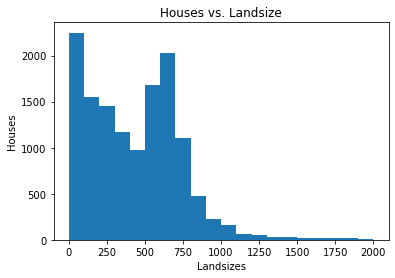

In [9]:
# code goes here
# n_bins = 20
graph_df = df['Landsize']
bin_sizes = []
for i in range(0,2001,100):
    bin_sizes.append(i)
# graph_adjusted = graph_df[graph_df.between(graph_df.quantile(.05), graph_df.quantile(.95))] 
graph_df.plot.hist(bins = bin_sizes)
plt.xlabel('Landsizes')
plt.ylabel('Houses')
plt.title('Houses vs. Landsize')
plt.show()

#Interestingly, there are outliers in the graph. 
#We excluded those outliers to get a better idea of what the histogram looks like.
#There is a maximum number of houses from 0-100 landsize and 600-700 Landsize.

## Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value

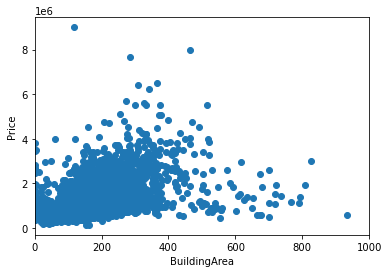

In [10]:
# code goes here
valid_buildingarea = df[df['BuildingArea'].notna()]
x = valid_buildingarea['BuildingArea']
y = valid_buildingarea['Price']
plt.scatter(x,y)
plt.xlim(0,1000)
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.show()

#overall, the trend we notices was that smaller the building area, less the price.

## List the top 10 SellerG, and what percentage of properties they have listed 

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

In [26]:
# code goes here
total_properties = len(df)
sellerG = df['SellerG'].value_counts()
top10 = pd.DataFrame(sellerG.head(10))
top10
top10 = top10.reset_index()
top10 = top10.rename(columns = {'index':'SellerG', 'SellerG':'Properties'})
top10
# percentage_top10 = top10['Properties'].apply(lambda x : (x/total_properties)*100)
# percentage_top10 = pd.DataFrame(percentage_top10)
# top10['Properties'] = percentage_top10['Properties']
# top10

,SellerG,Properties
0,Nelson,1565
1,Jellis,1316
2,hockingstuart,1167
3,Barry,1011
4,Ray,701
5,Marshall,659
6,Buxton,632
7,Biggin,393
8,Brad,342
9,Fletchers,301


## Fix a problem
Your boss has told you that the number of rooms was calculated incorrectly systematically across the entire data set.  Add one room to the Rooms column using two methods:

 - a for loop, and
 - using a single statement

In [12]:
# code goes here
# using the for loop
dfcopy = df.copy()
for ind in df.index:
    df['Rooms'][ind] += 1
df

# using single statement
dfcopy['Rooms'] = dfcopy['Rooms'].apply(lambda x : (x+1))
dfcopy

<ipython-input-12-26d7fd7fd32c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'][ind] += 1


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,3,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,3,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,4,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,4,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,5,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,5,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,4,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,4,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,5,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## What is the Address of the earliest built house in the data set?

In [46]:
# code goes here
# yearbuilts = df[df['YearBuilt'].notna()]
# newdf = df.loc[df['YearBuilt'].idxmin()]
# address_earliest = newdf['Address']
# address_earliest

df_min_year = df['YearBuilt'].min()
new = df['YearBuilt'] == df_min_year
address = df[new]
earliert_address = address['Address']
earliert_address

9968    5 Armstrong St
Name: Address, dtype: object

## Save a file 
The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the counsil person.  Export the file with only the allowed columns, and do not write and index column.

In [47]:
# code goes here
# 'Do no write and index column'????
melbourne = df[df['CouncilArea'] == 'Melbourne']
melbourne
# melbourne_new = melbourne[['Suburb','Price','Date']]
# melbourne_new.to_csv('outputfile.csv', index = False)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2644,Flemington,114 Shields St,3,h,957000.0,SP,Nelson,22/05/2016,4.4,3031.0,...,1.0,0.0,165.0,NaN,NaN,Melbourne,-37.78470,144.93410,Northern Metropolitan,3593.0
3506,Kensington,4 Coopers La,4,h,785000.0,S,Nelson,3/09/2016,4.2,3031.0,...,1.0,1.0,258.0,64.0,NaN,Melbourne,-37.79060,144.92400,Northern Metropolitan,5263.0
3507,Kensington,65 Gatehouse Dr,4,h,852000.0,S,Nelson,3/09/2016,4.2,3031.0,...,1.0,1.0,166.0,138.0,2000.0,Melbourne,-37.79290,144.91970,Northern Metropolitan,5263.0
3508,Kensington,35 Henry St,4,h,1037000.0,S,Rendina,3/09/2016,4.2,3031.0,...,1.0,1.0,188.0,106.0,1910.0,Melbourne,-37.79530,144.92750,Northern Metropolitan,5263.0
3509,Kensington,8 Bent St,3,h,775000.0,S,Jellis,3/12/2016,4.2,3031.0,...,1.0,0.0,150.0,NaN,NaN,Melbourne,-37.79630,144.93500,Northern Metropolitan,5263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073,Melbourne,709/87 Franklin St,3,u,565000.0,S,MICM,29/07/2017,0.0,3000.0,...,1.0,0.0,89.0,85.0,2003.0,Melbourne,-37.80802,144.96168,Northern Metropolitan,17496.0
12074,Melbourne,713/118 Russell St,3,u,540000.0,PI,Harcourts,29/07/2017,0.0,3000.0,...,1.0,0.0,0.0,NaN,1950.0,Melbourne,-37.81351,144.96908,Northern Metropolitan,17496.0
12104,North Melbourne,18/375 Abbotsford St,4,u,681000.0,S,JMRE,29/07/2017,1.8,3051.0,...,1.0,1.0,1843.0,NaN,1960.0,Melbourne,-37.79773,144.94611,Northern Metropolitan,6821.0
12105,North Melbourne,195 Peel St,3,h,1803000.0,SP,Alexkarbon,29/07/2017,1.8,3051.0,...,2.0,0.0,119.0,NaN,NaN,Melbourne,-37.80304,144.95614,Northern Metropolitan,6821.0
